<a href="https://colab.research.google.com/github/AlejandraFlores205/AluraStoreLatam/blob/main/TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TelecomX**

#Importando archivos

In [67]:

import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = '/content/TelecomX_Data.json'
df = pd.read_json(url)
df.sample(5)

,customerID,Churn,customer,phone,internet,account
5807,7945-HLKEA,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
4399,6023-YEBUP,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
232,0348-SDKOL,Yes,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
987,1389-WNUIB,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
5885,8044-BGWPI,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [68]:
df.shape

(7267, 6)

In [69]:
cliente=pd.json_normalize(df['customer'])
phone=pd.json_normalize(df['phone'])
internet=pd.json_normalize(df['internet'])
account=pd.json_normalize(df['account'])
datosIniciales=pd.concat([df['customerID'],df['Churn']],axis=1)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#Normalizando

In [71]:
dict_cols = ['customer', 'phone', 'account','internet']

for col in dict_cols:
    expanded = pd.json_normalize(df[col])
    df = pd.concat([df.drop(col, axis=1), expanded], axis=1)

In [72]:
df.sample(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1697,2404-JIBFC,No,Female,0,Yes,Yes,55,Yes,Yes,Two year,...,Bank transfer (automatic),85.10,4657.95,DSL,Yes,No,Yes,Yes,Yes,Yes
3334,4636-QRJKY,Yes,Female,0,Yes,Yes,6,Yes,Yes,Month-to-month,...,Electronic check,80.50,502.85,Fiber optic,No,No,No,Yes,No,No
4406,6034-YMTOB,No,Female,0,No,No,5,Yes,No,Month-to-month,...,Mailed check,75.65,399.45,Fiber optic,No,No,No,Yes,No,No


In [73]:
columnas = list(df)
columnas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   Contract          7267 non-null   object 
 10  PaperlessBilling  7267 non-null   object 
 11  PaymentMethod     7267 non-null   object 
 12  Charges.Monthly   7267 non-null   float64
 13  Charges.Total     7267 non-null   object 
 14  InternetService   7267 non-null   object 
 15  OnlineSecurity    7267 non-null   object 
 16  OnlineBackup      7267 non-null   object 


#Revisando datos

In [75]:
#Nulos
df.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
Contract,0


In [76]:
#Duplicados
duplicados = df[df['customerID'].duplicated(keep=False)]
duplicados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


#Modificando variables

In [77]:
df['ChargesTotal'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df.drop(columns=['Charges.Total'], inplace=True)

df['ChargesMonthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
df.drop(columns=['Charges.Monthly'], inplace=True)

In [78]:
df.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9


In [79]:

df.rename(columns={'gender': 'Gender',
                   'tenure': 'Tenure',
                   'customerID': 'CustomerID'}, inplace=True)


In [80]:
df.head(3)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9


#Creación de columnas

In [81]:
df['DailyCharges'] = df['ChargesMonthly'] / 30
df.sample(5)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
3863,5294-CDGWY,Yes,Male,0,Yes,Yes,51,No,No phone service,One year,...,DSL,Yes,Yes,Yes,No,Yes,Yes,3014.65,59.30,1.976667
1154,1636-NTNCO,No,Male,1,No,No,4,No,No phone service,Month-to-month,...,DSL,No,Yes,No,No,Yes,Yes,207.35,50.95,1.698333
804,1136-XGEQU,No,Female,0,Yes,Yes,50,Yes,Yes,One year,...,DSL,No,Yes,Yes,Yes,Yes,Yes,4164.40,84.15,2.805000
5040,6893-ODYYE,No,Male,0,No,No,50,Yes,No,One year,...,Fiber optic,Yes,Yes,Yes,Yes,No,No,4549.45,90.10,3.003333
4006,5480-TBGPH,Yes,Female,0,Yes,No,24,Yes,No,Month-to-month,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,2431.35,99.30,3.310000


#Transformación de Datos

In [82]:

bin_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Aplicar transformación a binario
for col in bin_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


df[bin_cols].head()

,Partner,Dependents,PhoneService,PaperlessBilling
0,1,1,1,1
1,0,0,1,0
2,0,0,1,1
3,1,0,1,1
4,1,0,1,1


In [84]:
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0})

df[['MultipleLines']].head()

,MultipleLines
0,0
1,1
2,0
3,0
4,0


In [87]:
colum_to_binary = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in colum_to_binary:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

df.sample(5)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
511,0725-CXOTM,No,Female,0,0,0,36,1,1,One year,...,DSL,1,0,1,1,1,1,3348.10,89.65,2.988333
7043,9701-CDXHR,No,Female,0,1,0,51,1,0,Month-to-month,...,Fiber optic,0,0,0,0,0,0,3649.60,69.15,2.305000
6450,8868-GAGIO,No,Male,0,1,0,45,1,1,Month-to-month,...,Fiber optic,1,0,1,0,0,0,3713.95,84.55,2.818333
3120,4350-ZTLPI,No,Female,0,1,0,53,1,1,One year,...,Fiber optic,0,1,1,1,1,1,5718.20,108.95,3.631667
5097,6968-GMKPR,No,Female,0,0,0,55,1,0,Month-to-month,...,Fiber optic,0,1,1,0,0,0,4509.50,81.55,2.718333


In [88]:
df['Churn'] = df['Churn'].apply(lambda x: x if x == 'Yes' or x =='No' else 'N/A')
df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,0,1,0,1,1,0,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,0,0,0,0,0,1,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,One year,...,DSL,1,0,0,1,0,0,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Month-to-month,...,Fiber optic,0,0,0,0,0,1,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,Month-to-month,...,DSL,0,1,0,0,0,0,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,Two year,...,DSL,1,0,1,1,0,1,4627.65,67.85,2.261667


In [89]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
N/A,224


In [90]:
df.to_json('Churn_de_Clientes.json', index= False)

In [83]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['MultipleLines'].value_counts()

,count
MultipleLines,
No,4202
Yes,3065


In [85]:
df.Contract.value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


#Reemplazando valores

In [86]:

contract_mapping = { 'Month-to-month': 1,
                     'One year': 2,
                     'Two year': 3}

df_contract = pd.DataFrame(list(contract_mapping.items()), columns=['Contract Type', 'Code'])
print(df_contract)


    Contract Type  Code
0  Month-to-month     1
1        One year     2
2        Two year     3


In [91]:
df.sample(10)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
410,0585-EGDDA,No,Male,0,1,0,40,1,0,Month-to-month,...,Fiber optic,0,1,1,0,0,0,3168.75,80.00,2.666667
598,0853-NWIFK,No,Female,0,0,0,45,1,0,One year,...,Fiber optic,1,1,0,0,1,1,4483.95,100.30,3.343333
3615,4986-MXSFP,No,Female,0,0,0,2,1,0,Month-to-month,...,No,0,0,0,0,0,0,40.90,20.00,0.666667
5578,7623-TRNQN,Yes,Male,0,0,1,1,1,0,Month-to-month,...,DSL,0,0,0,1,0,0,49.90,49.90,1.663333
3732,5141-ZUVBH,No,Female,0,0,1,9,1,0,Month-to-month,...,Fiber optic,1,0,1,1,0,1,870.25,93.00,3.100000
2188,3063-QFSZL,Yes,Female,0,0,0,1,1,0,Month-to-month,...,DSL,0,0,0,0,0,1,55.40,55.40,1.846667
2177,3050-GBUSH,No,Female,0,0,0,3,0,0,Month-to-month,...,DSL,0,0,0,0,1,0,113.95,34.80,1.160000
1909,2696-NARTR,Yes,Male,0,0,0,11,1,0,Month-to-month,...,Fiber optic,0,0,0,1,0,0,926.25,73.85,2.461667
320,0463-WZZKO,No,Male,0,0,0,3,1,0,Month-to-month,...,No,0,0,0,0,0,0,67.10,20.75,0.691667
4273,5876-QMYLD,No,Female,0,1,1,23,1,0,One year,...,No,0,0,0,0,0,0,415.10,20.05,0.668333


#Análisis de Datos

In [92]:
df1=df.groupby('Churn').size().reset_index(name='Total')
df1 = df1.set_index('Churn')
df1

,Total
Churn,
N/A,224
No,5174
Yes,1869


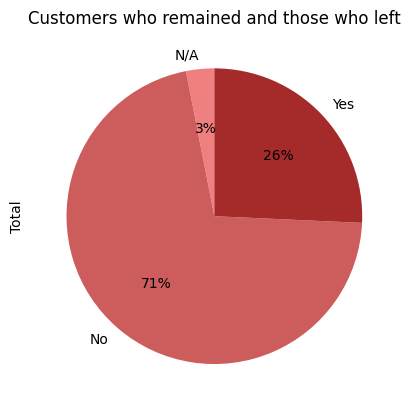

<Figure size 640x480 with 0 Axes>

In [96]:
df1['Total'].plot(kind='pie', autopct='%1.f%%', startangle=90, colors=['lightcoral', 'indianred','brown'])
plt.title('Customers who remained and those who left')
plt.show()

plt.savefig('grafico_churn.png', dpi=300, bbox_inches='tight')

In [98]:
cliente_evade = df.query('Churn == "Yes"')
cliente_evade.sample(5)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
4481,6140-QNRQQ,Yes,Male,0,0,0,1,1,0,Month-to-month,...,Fiber optic,0,0,0,0,0,0,71.55,71.55,2.385000
2588,3606-TWKGI,Yes,Male,1,0,0,13,1,1,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1364.30,106.90,3.563333
2854,3957-LXOLK,Yes,Female,1,0,0,28,1,1,Month-to-month,...,Fiber optic,0,1,1,0,1,1,3152.50,106.15,3.538333
5616,7666-WKRON,Yes,Female,0,0,0,39,1,0,Two year,...,Fiber optic,0,0,1,1,0,0,3201.55,80.45,2.681667
4591,6289-CPNLD,Yes,Male,0,1,1,33,1,0,One year,...,DSL,0,0,1,1,1,1,2405.05,73.90,2.463333


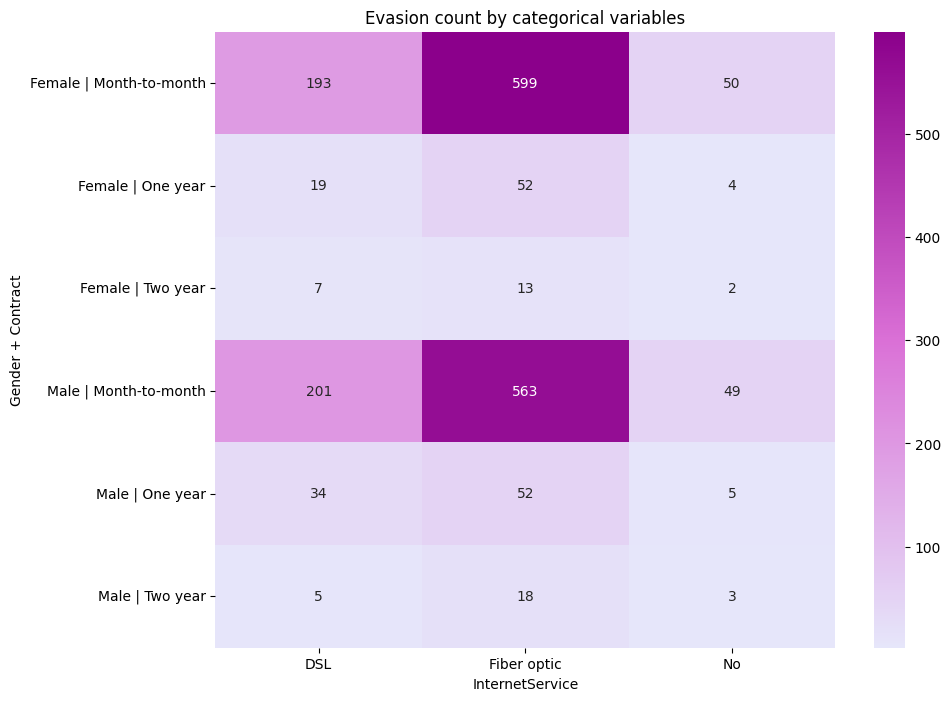

In [101]:
from matplotlib.colors import LinearSegmentedColormap
cliente_evade[['Gender','InternetService','Contract']].value_counts()
cliente_evade = cliente_evade.copy()

cliente_evade['Gender_Contract'] = cliente_evade['Gender'] + " | " + cliente_evade['Contract']

heatmap_data = cliente_evade.groupby(['Gender_Contract', 'InternetService']).size().unstack()

semaforo = LinearSegmentedColormap.from_list("semaforo", ["lavender", "orchid", "darkmagenta"])

plt.figure(figsize=(10, 8))

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap=semaforo)
plt.title('Evasion count by categorical variables')
plt.xlabel('InternetService')
plt.ylabel('Gender + Contract')
plt.show()


In [102]:
Variables_numericas = [ 'Churn', 'ChargesMonthly', 'Tenure']

df_evasion_num = df[Variables_numericas].sort_values('Churn').set_index('Churn')
df_evasion_num

,ChargesMonthly,Tenure
Churn,,
N/A,20.65,7
N/A,60.15,51
N/A,106.30,41
N/A,70.30,1
N/A,103.30,19
...,...,...
Yes,82.05,48
Yes,69.85,1
Yes,69.55,1


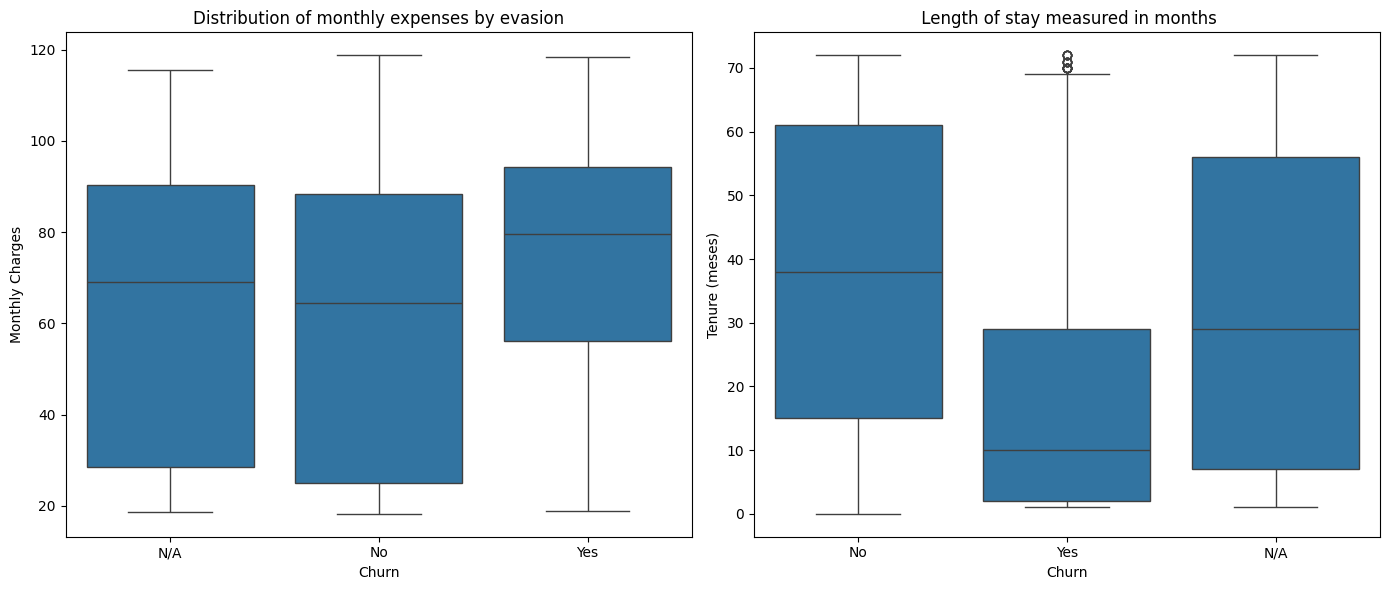

In [103]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.boxplot(data=df_evasion_num, x='Churn', y='ChargesMonthly')
plt.title('Distribution of monthly expenses by evasion')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='Tenure')
plt.title(' Length of stay measured in months')
plt.xlabel('Churn')
plt.ylabel('Tenure (meses)')

plt.tight_layout()
plt.show()

#Conclusión

Noté que los contratos a corto plazo, los pagos mensuales altos y la poca antigüedad están muy relacionados con que los clientes se den de baja. Este primer análisis puede servir como base para hacer modelos que predigan el churn y pensar en mejores estrategias para retenerlos.

También vi que el tipo de servicio de internet influye bastante: muchos de los clientes que cancelan usan DSL o no tienen servicios extra como seguridad en línea o soporte técnico.